# lab-3.01-probability


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 1 - Reliability of backups

A hard drive has a 1% probability to crash. Therefore, we take two backups, each having a 2% probability to crash. The three components work independently of each other. Data is lost only when all three components crash.

Question: what is the probability that the data is not lost?

`Als gebeurtenissen onafhankelijk zijn en je wilt weten of ze allemaal gebeuren, dan vermenigvuldig je hun kansen.`

In [2]:
# Gegeven kansen
p_hd = 0.01   # Kans dat de harde schijf crasht
p_b1 = 0.02   # Kans dat backup 1 crasht
p_b2 = 0.02   # Kans dat backup 2 crasht

# Kans dat alles crasht
p_loss = p_hd * p_b1 * p_b2

# Kans dat data niet verloren gaat
p_not_lost = 1 - p_loss

# Print resultaat
print("Kans dat de data NIET verloren gaat:", p_not_lost)


Kans dat de data NIET verloren gaat: 0.999996


### Exercise 2

_X_ is the number of broken eggs in a random carton of 12 eggs. The probability distribution of _X_ is as follows  

| | | | | | |
| :--- | :--- | :--- | :--- | :--- | :--- |
| _X_ | 0 | 1 | 2 | 3 | 4 |
| _P(X)_ | 0.65 | 0.20 | 0.10 | 0.04 | ? |

1. Only 0, 1, 2, 3 and 4 have probabilities > 0. What is the value for _P(4)_? `1 - 0.99 = 0.01`
2. What is the probability that a carton of 12 eggs has a maximum of 2 broken eggs? 
`We zoeken P(X≤2) ofwel: P(0)+P(1)+P(2)=0.65+0.20+0.10=0.95   ==> 0.95 of 95%` 
3. What is the probability that a carton of 12 eggs has at least 9 unbroken eggs?
`Een doos bevat 12 eieren, dus 9 ongebroken eieren betekent maximaal 3 gebroken eieren. We zoeken:`
`P(X≤3)=P(0)+P(1)+P(2)+P(3)  ==> =0.65+0.20+0.10+0.04=0.99 ==> 99%`
4. What is the probability that a carton of 12 eggs has exactly 9 unbroken eggs?
`P(X=3)=0.04 ==> 4%` 
5. A palette of 800 cartons of 12 eggs will have approximately how many broken eggs?
- `Eerst berekenen we het verwachte aantal gebroken eieren per doos.`
    - `E(X)=∑X⋅P(X)`
    - `= (0×0.65)+(1×0.20)+(2×0.10)+(3×0.04)+(4×0.01)`
    - `0+0.20+0.20+0.12+0.04=0.56`
    - `Dus gemiddeld 0.56 gebroken eieren per doos. ==> Voor 800 dozen: ==> 800 * 0.56 = 448 gebroken eieren`



### Exercise 3

There are two traffic lights on the route a given individual takes to go from his home to work.  
E = the event that the individual has to stop at the first light  
F = the event that the individual has to stop at the second light

$P(E)$ = 0.4  
$P(F)$ = 0.3  
$P(E ∩ F)$ = 0.15  

1. Are E and F independent events? Briefly explain why or why not?
    - `Twee gebeurtenissen zijn onafhankelijk als: P(E∩F)=P(E)⋅P(F)`
    - `P(E)⋅P(F)=0.4×0.3=0.12 ==> Maar gegeven P(E∩F)=0.15  --> Omdat 0.15 ≠ 0.12, zijn de gebeurtenissen niet onafhankelijk.`
2. What is the probability that the individual has to stop at at least one of the lights?
    - `Gebruik de formule voor de unie van twee gebeurtenissen:  P(E∪F)=P(E)+P(F)−P(E∩F) ==> =0.4+0.3−0.15=0.55 ==> 55%`
3. What is the probability that the individual should stop at neither light?
    - `Als de persoon bij minstens één stoplicht moet stoppen, is die kans 0.55. Dus de kans dat hij nergens hoeft te stoppen is: 1 − P(E∪F)=1−0.55=0.45 ==> 45%`
4. What is the probability that the individual has to stop at least at the first light?
    - `Dit betekent: stoppen bij het eerste stoplicht, ongeacht het tweede. ==> 0.4 ==> 40%`
5. What is the probability that the individual has to stop at exactly one of the lights?
    - `Hij moet stoppen bij één stoplicht, dus óf bij de eerste óf bij de tweede, maar niet bij beide.`
    
    - P(E ∩ $\overline{F}$) :  stopt bij eerste maar niet bij tweede: 
        - P(E)−P(E∩F)=0.4−0.15=0.25
    - P(F ∩ $\overline{E}$) : stopt bij tweede maar niet bij eerste: 
        - P(F)−P(E∩F)=0.3−0.15=0.15
    - `P(exactly one) = 0.25 + 0.15= 0.40 ==> 40%`

6. What is the probability that the individual has to stop at only the first light?
    - P(E ∩ $\overline{F}$) = 0.25 ==> `25%`


In [4]:
# Gegeven kansen
P_E = 0.4  # Kans dat de persoon stopt bij het eerste stoplicht
P_F = 0.3  # Kans dat de persoon stopt bij het tweede stoplicht
P_E_and_F = 0.15  # Kans dat de persoon bij beide stoplichten stopt

# 1. Zijn E en F onafhankelijk?
P_E_times_P_F = P_E * P_F
independent = P_E_and_F == P_E_times_P_F

# 2. Kans dat de persoon minstens één keer moet stoppen
P_E_or_F = P_E + P_F - P_E_and_F

# 3. Kans dat de persoon bij geen enkel stoplicht stopt
P_neither = 1 - P_E_or_F

# 4. Kans dat de persoon minstens bij het eerste stoplicht moet stoppen
P_at_least_first = P_E

# 5. Kans dat de persoon precies bij één stoplicht stopt
P_only_first = P_E - P_E_and_F  # Stopt bij eerste maar niet bij tweede
P_only_second = P_F - P_E_and_F  # Stopt bij tweede maar niet bij eerste
P_exactly_one = P_only_first + P_only_second

# 6. Kans dat de persoon alleen bij het eerste stoplicht stopt
P_only_first_light = P_only_first

# Resultaten printen
print(f"1. Zijn E en F onafhankelijk? {independent}")  # False
print(f"2. Kans op minstens één stop: {P_E_or_F:.2f}")
print(f"3. Kans op geen stop: {P_neither:.2f}")
print(f"4. Kans op minstens eerste stop: {P_at_least_first:.2f}")
print(f"5. Kans op exact één stop: {P_exactly_one:.2f}")
print(f"6. Kans op alleen eerste stop: {P_only_first_light:.2f}")


1. Zijn E en F onafhankelijk? False
2. Kans op minstens één stop: 0.55
3. Kans op geen stop: 0.45
4. Kans op minstens eerste stop: 0.40
5. Kans op exact één stop: 0.40
6. Kans op alleen eerste stop: 0.25


## Exercise 4

A box contains five pieces of paper marked €1, €1, €1, €10 and €25.  
A player chooses two pieces of paper and then wins the larger of the amounts on the two pieces of paper.  
Define a discrete random variable _X_ with _X_ = amount won.  
1. Determine the discrete probability distribution of this game
- $P(X = 1) = ?$
- $P(X = 10) = ?$
- $P(X = 25) = ?$
2. In *Prob_X* below, replace [0.1, 0.3, 0.5] with the values found for a graphical representation of the discrete probability distribution.  
3. Calculate the expectation value (expectation) of the random variable _X_.  


(Hint: consider the pieces of paper as numbered 1, 2, 3, 4 and 5.)



`########################################### OPLOSSING ###################################`


Een doos bevat vijf briefjes met de waarden **€1, €1, €1, €10 en €25**.  
Een speler trekt willekeurig **twee briefjes** en wint de **hoogste waarde** van de twee.  

---

## **Stap 1: Kansverdeling bepalen**  

### **1.1: Mogelijke combinaties**
We kiezen **twee briefjes** uit vijf. De mogelijke trekkingen zijn:

| Getrokken biljetten | Winnende bedrag (X) |
|----------------------|----------------------|
| €1, €1 | **€1** |
| €1, €1 | **€1** |
| €1, €10 | **€10** |
| €1, €10 | **€10** |
| €1, €25 | **€25** |
| €1, €25 | **€25** |
| €1, €10 | **€10** |
| €1, €10 | **€10** |
| €1, €25 | **€25** |
| €10, €25 | **€25** |

### **1.2: Kansen berekenen**
Er zijn **10 mogelijke paren** (omdat we 2 biljetten kiezen uit 5, dus \( \binom{5}{2} = 10 \)).

- **\( P(X = 1) \)**:  
   - Dit gebeurt als we **twee €1-biljetten** trekken.  
   - Aantal gunstige gevallen: **1** (\( \{€1, €1\} \))  
   - Kans:  
     \[
P(X = 1) = $\frac{2}{10}$
     \]

- **\( P(X = 10) \)**:  
   - Dit gebeurt als we **één €1- en één €10-biljet** trekken.  
   - Aantal gunstige gevallen: **4** (\( \{€1, €10\} \))  
   - Kans:  
     \[
     P(X = 10) = $\frac{4}{10}$
     \]

- **\( P(X = 25) \)**:  
   - Dit gebeurt als we **één €1- en één €25-biljet** of een **€10- en een €25-biljet** trekken.  
   - Aantal gunstige gevallen: **5** (\( \{€1, €25\}, \{€10, €25\} \))  
   - Kans:  
     \[
     P(X = 25) = $\frac{5}{10}$
     \]

**Conclusie:**  
\[
P(X = 1) = $\frac{2}{10}$, $\quad P(X = 10)$ = $\frac{4}{10}$, $\quad P(X = 25)$ = $\frac{5}{10}$
\]


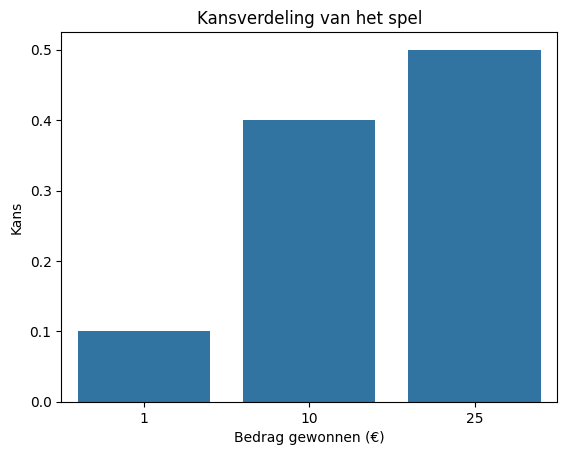

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

X = [1, 10, 25]  # Mogelijke uitkomsten
Prob_X = [1/10, 4/10, 5/10]  # Vervang met de gevonden waarden

sns.barplot(x=X, y=Prob_X)
plt.xlabel("Bedrag gewonnen (€)")
plt.ylabel("Kans")
plt.title("Kansverdeling van het spel")
plt.show()


### Exercise 5
John participates in an online game of chance. He can win EUR 1, EUR 2, EUR 3, EUR 4 or EUR 5. The probability of winning X EUR is directly proportional to the amount to be won, in other words  
$p(x) = k * x $ for x = 1, ... , 5
1. What is the value for k?
- `Omdat het een kansverdeling is, geldt dat de som van alle kansen gelijk moet zijn aan 1:`

    - `P(X=1)+P(X=2)+P(X=3)+P(X=4)+P(X=5)=1`

    - `(k⋅1)+(k⋅2)+(k⋅3)+(k⋅4)+(k⋅5)=1`

    - `k(1+2+3+4+5)=1`

    - `k⋅15=1 ==> k = 1/15`
    
    - `Dus: P(X = x) = x/15 (Omdat k = 1/15 dus 1/15 * x = x/15)`

2. What is the probability of winning a maximum of EUR 3?
- `We zoeken:`

    - `P(X≤3)=P(X=1)+P(X=2)+P(X=3)`
    - `1/15 + 2/15 + 3/15 ==> 6/15 ==> 04 ==> 40%`
3. Suppose Jan participates in the game of chance 100 times. Approximately how much will he then win?
    - `De verwachtingswaarde E(X) berekenen we als: ∑x_i * P(X=x_i)`
    - `E(X) = (1 * 1/15) + (2 * 2/15) + (3 * 3/15) + (4 * 4/15) + (5 * 5/15)`
    - `E(X) = 55/15 = 3.67`
    - `Dus na 100 spellen wint John gemiddeld: 100 * 3.67 = 367`
        - `John wint ongeveer €367 na 100 keer spelen.`



### Exercise 6 - Probabilities for normal distributions

Calculate the given probabilities in the standard normal distribution $Z \sim Nor(\mu=0, \sigma=1)$. Compare your solutions with the given answers.

|     | Calculate the following probabilities:             | Answer: |
| :-- | :--------------------- | :------ |
| 1.  | $P(Z < 1.33)$          | 0.908   |
| 2.  | $P(Z > 1.33)$          | 0.092   |
| 3.  | $P(Z < −1.33)$         | 0.092   |
| 4.  | $P(Z > −1.33)$         | 0.908   |
| 5.  | $P(Z < 0.45)$          | 0.674   |
| 6.  | $P(Z > −1.05)$         | 0.853   |
| 7.  | $P(Z < 0.65)$          | 0.742   |
| 8.  | $P(−0.45 < Z < 1.20)$  | 0.559   |
| 9.  | $P(−1.35 < Z < −0.10)$ | 0.372   |
| 10. | $P(−2.10 < Z < −0.90)$ | 0.166   |

In [2]:
import scipy.stats as stats

# 1. P(Z < 1.33)
prob_1 = stats.norm.cdf(1.33)

# 2. P(Z > 1.33) = 1 - P(Z < 1.33)
prob_2 = 1 - prob_1

# 3. P(Z < -1.33)
prob_3 = stats.norm.cdf(-1.33)

# 4. P(Z > -1.33) = 1 - P(Z < -1.33)
prob_4 = 1 - prob_3

# 5. P(Z < 0.45)
prob_5 = stats.norm.cdf(0.45)

# 6. P(Z > -1.05) = 1 - P(Z < -1.05)
prob_6 = 1 - stats.norm.cdf(-1.05)

# 7. P(Z < 0.65)
prob_7 = stats.norm.cdf(0.65)

# 8. P(-0.45 < Z < 1.20) = P(Z < 1.20) - P(Z < -0.45)
prob_8 = stats.norm.cdf(1.20) - stats.norm.cdf(-0.45)

# 9. P(-1.35 < Z < -0.10) = P(Z < -0.10) - P(Z < -1.35)
prob_9 = stats.norm.cdf(-0.10) - stats.norm.cdf(-1.35)

# 10. P(-2.10 < Z < -0.90) = P(Z < -0.90) - P(Z < -2.10)
prob_10 = stats.norm.cdf(-0.90) - stats.norm.cdf(-2.10)

# Print resultaten
print(f"1. P(Z < 1.33) = {prob_1:.3f}")
print(f"2. P(Z > 1.33) = {prob_2:.3f}")
print(f"3. P(Z < -1.33) = {prob_3:.3f}")
print(f"4. P(Z > -1.33) = {prob_4:.3f}")
print(f"5. P(Z < 0.45) = {prob_5:.3f}")
print(f"6. P(Z > -1.05) = {prob_6:.3f}")
print(f"7. P(Z < 0.65) = {prob_7:.3f}")
print(f"8. P(-0.45 < Z < 1.20) = {prob_8:.3f}")
print(f"9. P(-1.35 < Z < -0.10) = {prob_9:.3f}")
print(f"10. P(-2.10 < Z < -0.90) = {prob_10:.3f}")


1. P(Z < 1.33) = 0.908
2. P(Z > 1.33) = 0.092
3. P(Z < -1.33) = 0.092
4. P(Z > -1.33) = 0.908
5. P(Z < 0.45) = 0.674
6. P(Z > -1.05) = 0.853
7. P(Z < 0.65) = 0.742
8. P(-0.45 < Z < 1.20) = 0.559
9. P(-1.35 < Z < -0.10) = 0.372
10. P(-2.10 < Z < -0.90) = 0.166


![Z](Photo's/Screenshot%202025-03-21%20175157.png)

### Exercise 7 - Plot probability density
Make a graphical plot of the probability density function and the cumulative distribution function of a normal distribution with $\mu = 2.5$ and $\sigma = 1.5$.

What is the area under the density function between  x=0.5  and  x=4 . (Answer = 0.750)

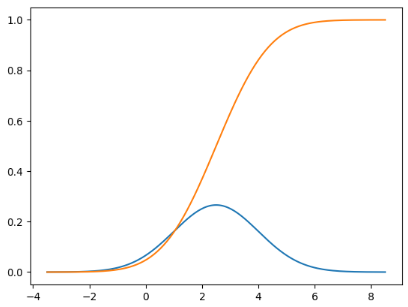

- `De PDF (Probability Density Function) laat zien hoe waarschijnlijk een bepaalde waarde is.`
- `De CDF (Cumulative Distribution Function) geeft de kans dat X kleiner is dan een bepaalde waarde.`

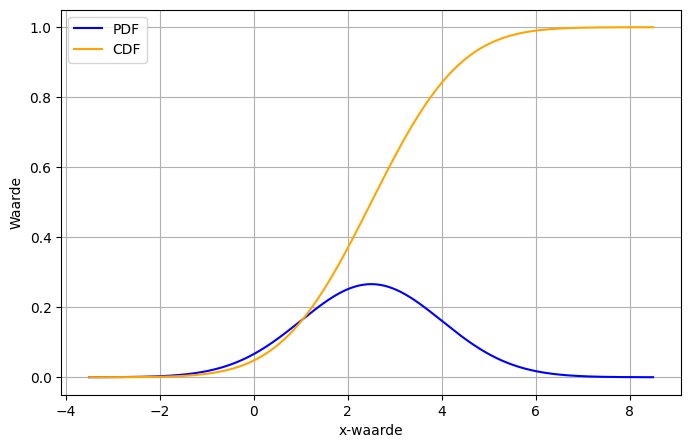

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters van de normale verdeling
mu = 2.5  # Gemiddelde
sigma = 1.5  # Standaarddeviatie

# X-waarden genereren
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# PDF en CDF berekenen
pdf = stats.norm.pdf(x, mu, sigma)  # Kansdichtheidsfunctie
cdf = stats.norm.cdf(x, mu, sigma)  # Cumulatieve verdelingsfunctie

# Plotten van PDF en CDF
plt.figure(figsize=(8,5))
plt.plot(x, pdf, label="PDF", color="blue")   # Blauwe lijn voor PDF
plt.plot(x, cdf, label="CDF", color="orange") # Oranje lijn voor CDF
plt.xlabel("x-waarde")
plt.ylabel("Waarde")
plt.legend()
plt.grid()
plt.show()


In [4]:
# Berekening van de kans
p_x_less_4 = stats.norm.cdf(4, mu, sigma)
p_x_less_05 = stats.norm.cdf(0.5, mu, sigma)

probability = p_x_less_4 - p_x_less_05
print(f"P(0.5 ≤ X ≤ 4) = {probability:.3f}")  # Moet ongeveer 0.750 zijn


P(0.5 ≤ X ≤ 4) = 0.750


### Exercise 8 - Theoretical vs real probability density
Generate 25 random numbers distributed according to the standard normal distribution. Plot a histogram with probability density function and the theoretical probability density.
Do the same for 250 and 2500 numbers.
Notice how the real probability density approaches the theoretical one as the sample size increases.

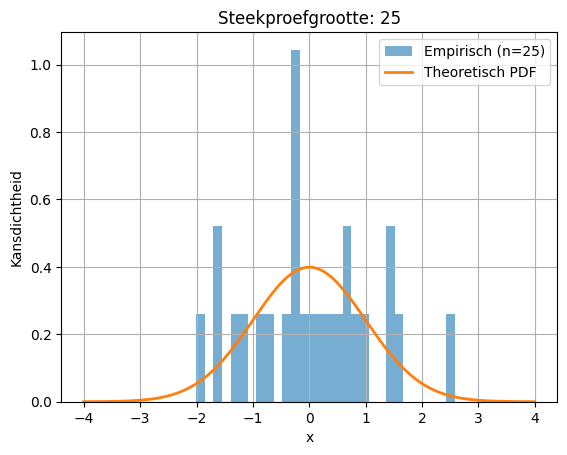

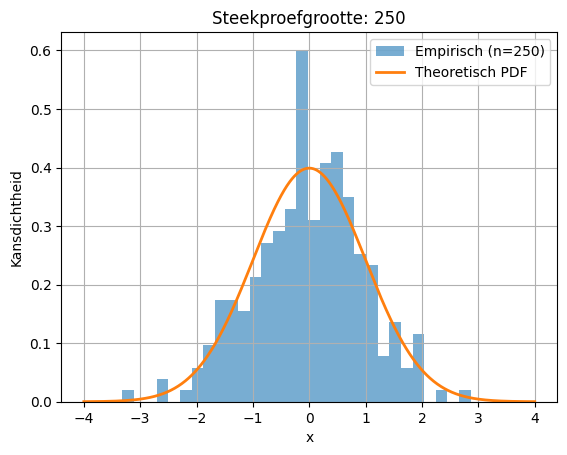

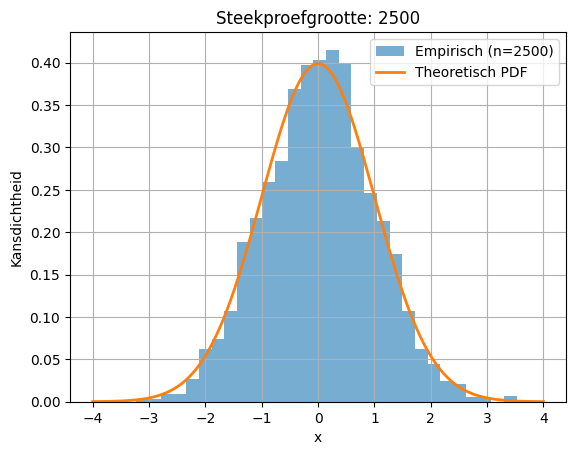

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Functie om plot te maken
def plot_normal_sample(n):

    # Deze regel genereert n willekeurige getallen volgens een normale verdeling met:
        # loc=0: het gemiddelde μ=0
        # scale=1: de standaardafwijking σ=1
        # size=n: het aantal gegenereerde getallen (bijvoorbeeld 25, 250, of 2500)
    data = np.random.normal(loc=0, scale=1, size=n)

    # Maak histogram (genormaliseerd zodat het een kansdichtheid is)
    plt.hist(data, bins=30, density=True, alpha=0.6, label='Empirisch (n=' + str(n) + ')')

    # Theoretische PDF tekenen
    # In een standaardnormale verdeling ligt vrijwel alle kans (ruim 99.99%) tussen μ±4σ, dus tussen -4 en 4.
    # Het is genoeg om de PDF goed te tekenen zonder dat je te ver hoeft te gaan.
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x, loc=0, scale=1), label='Theoretisch PDF', linewidth=2)

    plt.title(f'Steekproefgrootte: {n}')
    plt.xlabel('x')
    plt.ylabel('Kansdichtheid')
    plt.legend()
    plt.grid(True)
    plt.show()

# Maak de drie plots
plot_normal_sample(25)
plot_normal_sample(250)
plot_normal_sample(2500)


### Exercise 9

Suppose that the distribution of net typing speed in words per minute (wpm) for experienced typists can be approximated by a normal curve with mean 60 wpm and standard deviation 15 wpm
1. What is the probability that the net typing speed of a randomly selected typist
is at most 60 wpm?
2. What is the probability that the net speed of a randomly selected typist's
net speed is between 45 and 90 wpm?
3. Would you be surprised to find a typist
whose net speed is higher than 105 wpm?
4. Suppose special training will be given to the slowest 20% of typists. Which typing speeds would qualify for this training?

In [9]:
import scipy.stats as stats

# Gegeven parameters van de normale verdeling
mu = 60  # Gemiddelde (mean)
sigma = 15  # Standaarddeviatie

# 1. P(X ≤ 60)
prob_1 = stats.norm.cdf(60, loc=mu, scale=sigma)
print(f"1. P(X ≤ 60) = {prob_1:.4f}")

# 2. P(45 ≤ X ≤ 90) = P(X ≤ 90) - P(X ≤ 45)
prob_2 = stats.norm.cdf(90, loc=mu, scale=sigma) - stats.norm.cdf(45, loc=mu, scale=sigma)
print(f"2. P(45 ≤ X ≤ 90) = {prob_2:.4f}")

# 3. P(X > 105) = 1 - P(X ≤ 105)
prob_3 = 1 - stats.norm.cdf(105, loc=mu, scale=sigma)
print(f"3. P(X > 105) = {prob_3:.4f}")
print("Ja" if prob_3 < 0.05 else "Nee", "- Dit is een zeldzame gebeurtenis, dus het zou verrassend kunnen zijn.")

# 4. Onderste 20% → Zoek x waarvoor P(X ≤ x) = 0.20
slowest_20 = stats.norm.ppf(0.20, loc=mu, scale=sigma)
print(f"4. De laagste 20% hebben een snelheid onder: {slowest_20:.2f} wpm")


1. P(X ≤ 60) = 0.5000
2. P(45 ≤ X ≤ 90) = 0.8186
3. P(X > 105) = 0.0013
Ja - Dit is een zeldzame gebeurtenis, dus het zou verrassend kunnen zijn.
4. De laagste 20% hebben een snelheid onder: 47.38 wpm


![a](Photo's/Screenshot%202025-04-14%20200218.png)

![W](Photo's/Screenshot%202025-04-14%20200428.png)
![WWW](Photo's/Screenshot%202025-04-14%20200458.png)

## Exercise 10

Consider the two games of chance mentioned in the slides:

- Bet on: at least one six when throwing a fair die 4 consecutive times.
- Bet on: at least one "double six" when throwing two fair dice 24 times.

Question: calculate the exact probability of winning each of these two games. Compare your answer with the long-term frequency of winning shown in the slides.

![A](Photo's/Screenshot%202025-03-21%20180425.png)

In [9]:
p_no_six = (5/6) ** 4
p_at_least_one_six = 1 - p_no_six
print(f"Kans op minstens één zes in 4 worpen: {p_at_least_one_six:.4f}")


Kans op minstens één zes in 4 worpen: 0.5177


![Q](Photo's/Screenshot%202025-03-21%20180512.png)

In [10]:
p_no_double_six = (35/36) ** 24
p_at_least_one_double_six = 1 - p_no_double_six
print(f"Kans op minstens één dubbele zes in 24 worpen: {p_at_least_one_double_six:.4f}")


Kans op minstens één dubbele zes in 24 worpen: 0.4914


## Exercise 11 - Expectation of $X-a$

Consider the probability distribution of the random variable $X$ giving the sum of the eyes when throwing two dice.

- This probability distribution is symmetric around 7. Verify (by using the definition of expectation) that the expectation of $X$ is also 7.

- Suppose that you have to pay €8 to play a game where your earnings are the sum of the eyes when throwing two dice. Denote your profit (or loss) by $Y$. What is the relationship between $Y$ and $X$? Give the expectation of $Y$. What is the relationship with the expectation of $X$?

- Can you see a general relationship between the expectation of $X − a$ and that of $X$, where $a$ is a real number?

![A](Photo's/Screenshot%202025-04-14%20205337.png)
![A](Photo's/Screenshot%202025-04-14%20205414.png)
![A](Photo's/Screenshot%202025-04-14%20205451.png)
![A](Photo's/Screenshot%202025-04-14%20205515.png)
![A](Photo's/Screenshot%202025-03-21%20181057.png)

In [10]:
# Waarden van X (som van 2 dobbelstenen)
values = list(range(2, 13))  # 2 t/m 12

# Aantal manieren om elke som te krijgen
frequencies = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]  # gebaseerd op dobbelstenen

# Kans voor elke waarde (aantal manieren gedeeld door 36)
probabilities = [f / 36 for f in frequencies]

# Verwachtingswaarde berekenen: som(x * P(x))
expectation = sum(x * p for x, p in zip(values, probabilities))

print(f"De verwachtingswaarde van X is: {expectation:.2f}")


De verwachtingswaarde van X is: 7.00


## Exercise 12 - Variance of $X/a$

Consider the probability distribution of the random variable $X$ giving the sum of the eyes when throwing two dice.

- Calculate the variance of $X$.

- Suppose the profit you make is only half of the sum of the eyes when throwing two dice. Denote your profit (or loss) by $Y$. What is the relationship between $Y$ and $X$? Give the variance of $Y$. What is the relationship with the variance of $X$?

- Can you see a general relationship between the variance of $X/a$ and that of $X$, where $a$ is a real non-zero number?

![AA](Photo's/Screenshot%202025-05-17%20172536.png)
![AA](Photo's/Screenshot%202025-05-17%20172611.png)
![AA](Photo's/Screenshot%202025-05-17%20172640.png)
![AA](Photo's/Screenshot%202025-05-17%20172711.png)
![AA](Photo's/Screenshot%202025-05-17%20172732.png)

$$
\mathrm{Var}\left(\frac{X}{a}\right) = \left(\frac{1}{a}\right)^2 \cdot \mathrm{Var}(X) = \frac{1}{a^2} \cdot \mathrm{Var}(X)
$$


In [12]:
# Stap 1: Bereken de variantie van X

import numpy as np

# Mogelijke waarden van X (som van twee dobbelstenen)
X_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Bijbehorende kansen van X
X_probs = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36

# Verwachtingswaarde van X
E_X = np.sum(X_values * X_probs)

# Verwachtingswaarde van X^2
E_X2 = np.sum((X_values**2) * X_probs)

# Variantieberekening
Var_X = E_X2 - E_X**2
print(f"Var(X) = {Var_X:.4f}")


Var(X) = 5.8333


In [13]:
# Stap 2: Bereken de variantie van Y=X/2

a = 1/2  # Schaalfactor
Var_Y = (a**2) * Var_X  # Eigenschap van variantie bij transformaties
print(f"Var(Y) = {Var_Y:.4f}")


Var(Y) = 1.4583


In [16]:
# Stap 3: Algemene relatie
def compute_variance(X_values, X_probs, a):
    E_X = np.sum(X_values * X_probs)
    E_X2 = np.sum((X_values**2) * X_probs)
    Var_X = E_X2 - E_X**2
    Var_Xa = (1 / a**2) * Var_X  # Algemene formule
    return Var_X, Var_Xa

# Test met verschillende waarden van a
a_values = [2, 3, 4]
for a in a_values:
    Var_X, Var_Xa = compute_variance(X_values, X_probs, a) 
    print(f"a = {a}, Var(X) = {Var_X:.4f}, Var(X/{a}) = {Var_Xa:.4f}")


a = 2, Var(X) = 5.8333, Var(X/2) = 1.4583
a = 3, Var(X) = 5.8333, Var(X/3) = 0.6481
a = 4, Var(X) = 5.8333, Var(X/4) = 0.3646


## Exercise 13 - Expectation and variance of $(X−\mu)/\sigma$)

Using the information from the two previous exercises, determine the expectation and variance for a random variable $Z$ given by

$Z = \frac{X-\mu_X}{\sigma_X}$

##  Verwachting en variantie van de gestandaardiseerde variabele \( Z \)

We bekijken de gestandaardiseerde versie van een toevalsvariabele \( X \):

$$
Z = \frac{X - \mu_X}{\sigma_X}
$$

Hierin is:
- $( \mu_X $): het gemiddelde (verwachting) van $( X $)
- $( \sigma_X $): de standaardafwijking van $( X $)

---

###  Doel van standaardiseren:
We willen een nieuwe variabele $( Z $) maken met:
- Gemiddelde $( E[Z] = 0 $)
- Variantie $( \text{Var}(Z) = 1 $)

---

### 🔹 Verwachting van \( Z \)

$$
E[Z] = E\left[\frac{X - \mu_X}{\sigma_X}\right]
$$

We gebruiken de regel:  
$$
E[aX + b] = a \cdot E[X] + b
$$

Hier is $( a = \frac{1}{\sigma}*X $), en $( b = -\frac{\mu_X}{\sigma_X} $).  
Dus:

$$
E[Z] = \frac{1}{\sigma_X} \cdot E[X] - \frac{\mu_X}{\sigma_X}
$$

Omdat $( E[X] = \mu_X $), wordt dit:

$$
E[Z] = \frac{\mu_X - \mu_X}{\sigma_X} = 0
$$

 **Conclusie**:  
De verwachting van $( Z $) is **0**.

---

### 🔹 Variantie van \( Z \)

$$
\text{Var}(Z) = \text{Var}\left(\frac{X - \mu_X}{\sigma_X}\right)
$$

We gebruiken de regel:  
$$
\text{Var}(aX + b) = a^2 \cdot \text{Var}(X)
$$

Dus:

$$
\text{Var}(Z) = \left(\frac{1}{\sigma_X}\right)^2 \cdot \text{Var}(X)
$$

Maar $$ \text{Var}(X) = \sigma_X^2 $$ , dus:

$$
\text{Var}(Z) = \frac{\sigma_X^2}{\sigma_X^2} = 1
$$

 **Conclusie**:  
De variantie van $( Z $) is **1**.

---

###  Samenvatting

Als je een variabele $( X $) standaardiseert:

$$
Z = \frac{X - \mu_X}{\sigma_X}
$$

dan krijg je altijd:

- $( E[Z] = 0 $)
- $( \text{Var}(Z) = 1 $)

Dit is de basis van de **standaardnormale verdeling**, en wordt vaak gebruikt in statistiek om kansberekeningen eenvoudiger te maken.


In [17]:
import numpy as np

# Mogelijke waarden van X (som van twee dobbelstenen)
X_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Bijbehorende kansen van X
X_probs = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36

# Bereken verwachting en standaardafwijking van X
E_X = np.sum(X_values * X_probs)
E_X2 = np.sum((X_values**2) * X_probs)
Var_X = E_X2 - E_X**2
std_X = np.sqrt(Var_X)

# Transformeer naar Z
Z_values = (X_values - E_X) / std_X

# Verwachting van Z
E_Z = np.sum(Z_values * X_probs)

# Variantieberekening van Z
E_Z2 = np.sum((Z_values**2) * X_probs)
Var_Z = E_Z2 - E_Z**2

# Print resultaten
print(f"E[Z] = {E_Z:.4f}")  # Moet ongeveer 0 zijn
print(f"Var(Z) = {Var_Z:.4f}")  # Moet ongeveer 1 zijn


E[Z] = 0.0000
Var(Z) = 1.0000
